In [3]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3,suppress=True)

In [4]:
#Datos conocidos
'Distancia 1,2,3 y total en metros'
DAB = 2
DBC = 2
DCD = 2
DT = 6
'Fuerza distribuida cuadrada en kN/m'
Dis_1 = 10

'Fuerza distribuida triángular en kN/m'
Dis_2 = 10

#Definir simbolos
Ax,Ay,Dy,x = sp.symbols("Ax Ay Dy x")
'''
Se determinan las reacciones mediante la estática ya que contamos con 3 incognitas y 3 ecuaciones, tenemos una 
estructura isoestática
'''
#Sumatoria de momentos
Sum_M = -(Dis_1*DAB)*(DAB/2) - (DCD*Dis_2/2)*(DT-2/3) + 6*Dy
Ecu_1 = sp.Eq(Sum_M,0)
dy = sp.solve(Ecu_1)

#Sumatoria de fuerzas en y
Sum_Fy = Ay- (Dis_1*DAB) - (DCD*Dis_2/2) + Dy
Ecu_2 = sp.Eq(Sum_Fy,0)
ay = sp.solve(Ecu_2.subs(Dy,dy[0]))

In [5]:
dy

[12.2222222222222]

In [6]:
ay

[17.7777777777778]

In [7]:
'Para encontrar las fuerzas cortantes y los momentos de flexión usaré el método de integrales'
#Tramo 1 0 <= x <= 2
'Cortante del tramo'
V1 = ay[0] - sp.integrate(Dis_1,x)
V1_0 = V1.subs(x,0)
V1_2 = V1.subs(x,2)
'Momento del tramo'
M1 = 0 + sp.integrate(V1,x)
M1_0 = M1.subs(x,0)
M1_2 = M1.subs(x,2)

In [8]:
print("CORTANTE PRIMER TRAMO")
V1

CORTANTE PRIMER TRAMO


17.7777777777778 - 10*x

In [9]:
print("V1 evaluado en 0")
V1_0

V1 evaluado en 0


17.7777777777778

In [10]:
print("V1 evaluado en 2")
V1_2

V1 evaluado en 2


-2.22222222222222

In [11]:
print("CORTANTE PRIMER TRAMO")
M1

CORTANTE PRIMER TRAMO


-5.0*x**2 + 17.7777777777778*x

In [12]:
print("M1 evaluado en 0")
M1_0

M1 evaluado en 0


0

In [13]:
print("M1 evaluado en 2")
M1_2

M1 evaluado en 2


15.5555555555556

In [14]:
#Segundo tramo 0 <= x <= 2
'Cortante del tramo'
V2 = V1_2

'Momento del tramo'
M2 = M1_2 + sp.integrate(V2,x)
M2_0 = M2.subs(x,0)
M2_2 = M2.subs(x,2)

In [15]:
print("CORTANTE SEGUNDO TRAMO")
V2

CORTANTE SEGUNDO TRAMO


-2.22222222222222

In [16]:
"En este caso V2 es constante en todo el tramo"

'En este caso V2 es constante en todo el tramo'

In [17]:
print("MOMENTO SEGUNDO TRAMO")
M2

MOMENTO SEGUNDO TRAMO


15.5555555555556 - 2.22222222222222*x

In [18]:
print("M2 evaluado en 0")
M2_0

M2 evaluado en 0


15.5555555555556

In [19]:
print("M2 evaluado en 2")
M2_2

M2 evaluado en 2


11.1111111111111

In [20]:
#Tramo 3 0 <= x <= 2
'En este caso primero debo definir la ecuación de la carga distribuida'
m,b= sp.symbols("m b")
Ecu_3 = m*x + b

'Cuando x = 0, la carga es 0'
be = sp.solve(Ecu_3.subs(x,0))

'Cuando x = 2, la carga es 10'
Ecu_3f =sp.Eq(m*x + be[0],10) 
M = sp.solve(Ecu_3f.subs(x,2))

'Ecuación distribuida del tramo'
n3 = M[0]*x + be[0]

'Cortante del tramo'
V3 = V2 - sp.integrate(n3,x)
V3_0 = V3.subs(x,0)
V3_2 = V3.subs(x,2)

'Momento del tramo'
M3 = M2_2 + sp.integrate(V3,x)
M3_0 = M3.subs(x,0)
M3_2 = M3.subs(x,2)

In [21]:
print("CORTANTE TERCER TRAMO")
V3

CORTANTE TERCER TRAMO


-5*x**2/2 - 2.22222222222222

In [22]:
print("V3 evaluado en 0")
V3_0

V3 evaluado en 0


-2.22222222222222

In [23]:
print("V3 evaluado en 2")
V3_2

V3 evaluado en 2


-12.2222222222222

In [24]:
print("MOMENTO TERCER TRAMO")
M3

MOMENTO TERCER TRAMO


-0.833333333333333*x**3 - 2.22222222222222*x + 11.1111111111111

In [25]:
print("M3 evaluado en 0")
M3_0

M3 evaluado en 0


11.1111111111111

In [26]:
print("M3 evaluado en 2")
M3_2

M3 evaluado en 2


4.44089209850063e-15

In [27]:
'El momento máximo se da cuando la fuerza cortante es nula, por ello para encontrar el momento, primero debo ver donde v = 0'
#El cortante se hace cero en el primer tramo, por ello la ecuación del primer tramo se iguala a cero
Ecu_4 = sp.Eq(V1,0)
SLN = sp.solve(Ecu_4)
print(f"El cortante es cero a {round(SLN[0],3)} metros del nodo A.")

El cortante es cero a 1.778 metros del nodo A.


In [28]:
#Ahora, teniendo la posición, se evalua dicho valor en la ecuación de momento flector del tramo
M_max = M1.subs(x,SLN[0])
print(f"El momento máximo tiene un valor de {round(M_max,3)} kN*m y se presenta en el primer tramo de la viga.")

El momento máximo tiene un valor de 15.802 kN*m y se presenta en el primer tramo de la viga.


DIAGRAMA DE FUERZA CORTANTE
El cortante máximo se presenta el principio del primer tramo, es positivo y tiene un valor de 17.778 kN.


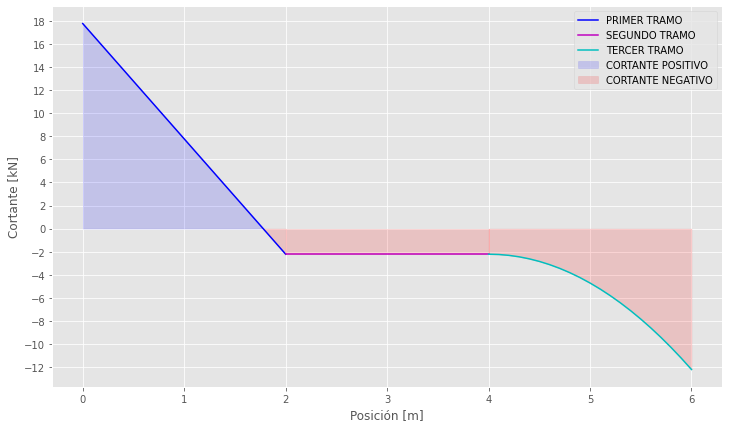

In [29]:
plt.style.use('ggplot')
fig =plt.figure(figsize=(12,7))

print("DIAGRAMA DE FUERZA CORTANTE")
'Tramo 1'
V1x = np.array([0,2])
V1y = np.array([V1_0,V1_2])
V1y = V1y.astype(np.float64)

'Tramo 2'
V2x = np.array([2,4])
V2y = np.array([V2,V2])
V2y = V2y.astype(np.float64)

'Tramo 3'
V3_n = np.arange(0,2.1,0.1)
V3x = 4 + V3_n
V3y = np.array([])
V3y = V3y.astype(np.float64)
for i in V3_n:
    Vn = V3.subs(x,i)
    V3y = np.append(V3y,Vn)
V3y = V3y.astype(np.float64)

plt.plot(V1x,V1y,color="b",label="PRIMER TRAMO")
plt.plot(V2x,V2y,color="m",label="SEGUNDO TRAMO")
plt.plot(V3x,V3y,color="c",label="TERCER TRAMO")
plt.xlabel("Posición [m]")
plt.ylabel("Cortante [kN]")
plt.yticks(np.arange(-14,19,2))

plt.fill_between(V1x,V1y, where=(V1y > 0), interpolate=True, alpha=0.15,color="b",label="CORTANTE POSITIVO")
plt.fill_between(V1x,V1y, where=(V1y < 0), interpolate=True, alpha=0.15,color="r",label="CORTANTE NEGATIVO")
plt.fill_between(V2x,V2y, where=(V2y < 0), interpolate=True, alpha=0.15,color="r")
plt.fill_between(V3x,V3y, where=(V3y < 0), interpolate=True, alpha=0.15,color="r")
plt.legend()
plt.show
print(f"El cortante máximo se presenta el principio del primer tramo, es positivo y tiene un valor de {round(V1_0,3)} kN.")

DIAGRAMA DE MOMENTO FLECTOR
El momento máximo se presenta en el primer tramo, es positivo y tiene un valor de 15.802 kN*m.


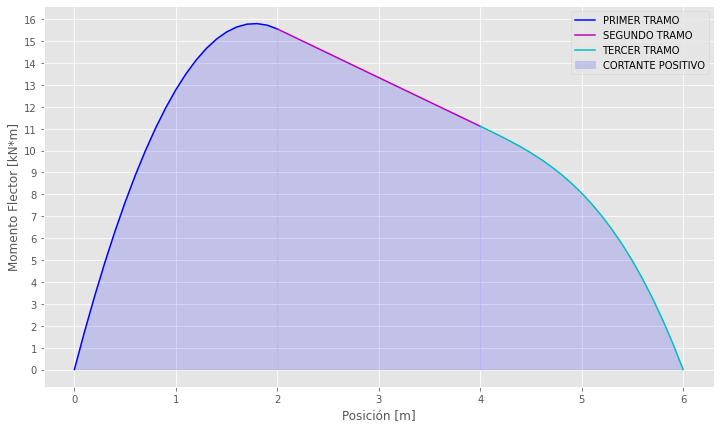

In [30]:
fig =plt.figure(figsize=(12,7))
print("DIAGRAMA DE MOMENTO FLECTOR")
'Tramo 1'
M1_n = np.arange(0,2.1,0.1)
M1x = M1_n
M1y = np.array([])
M1y = M1y.astype(np.float64)
for i in M1_n:
    Mn1 = M1.subs(x,i)
    M1y = np.append(M1y,Mn1)
M1y = M1y.astype(np.float64)

'Tramo 2'
M2x = np.array([2,4])
M2y = np.array([M2_0,M2_2])
M2y = M2y.astype(np.float64)

'Tramo 3'
M3_n = np.arange(0,2.1,0.1)
M3x = 4 + M3_n
M3y = np.array([])
M3y = M3y.astype(np.float64)
for i in M3_n:
    Mn2 = M3.subs(x,i)
    M3y = np.append(M3y,Mn2)
M3y = M3y.astype(np.float64)

plt.plot(M1x,M1y,color="b",label="PRIMER TRAMO")
plt.plot(M2x,M2y,color="m",label="SEGUNDO TRAMO")
plt.plot(M3x,M3y,color="c",label="TERCER TRAMO")
plt.xlabel("Posición [m]")
plt.ylabel("Momento Flector [kN*m]")
plt.yticks(np.arange(0,17))
plt.fill_between(M1x,M1y, interpolate=True, alpha=0.15,color="b",label="CORTANTE POSITIVO")
plt.fill_between(M2x,M2y, interpolate=True, alpha=0.15,color="b")
plt.fill_between(M3x,M3y, interpolate=True, alpha=0.15,color="b")
plt.legend()

print(f"El momento máximo se presenta en el primer tramo, es positivo y tiene un valor de {round(M_max,3)} kN*m.")

In [31]:
'Para encontrar las variaciones de momentos lo mas adecuado es utilizar bucles'
VriaF1 = np.arange(10,70,10)
VriaF2 = np.arange(10,70,10)
ReacD = np.array([]) 
ReacA = np.array([])

for i in range(0,6):
    
    #Sumatoria de momentos
    Sum_M = -(VriaF1[i]*DAB)*(DAB/2) - (DCD*VriaF2[i]/2)*(DT-2/3) + 6*Dy
    Ecu_1 = sp.Eq(Sum_M,0)
    dy = sp.solve(Ecu_1)
    ReacD = np.append(ReacD,dy)

    #Sumatoria de fuerzas en y
    Sum_Fy = Ay- (VriaF1[i]*DAB) - (DCD*VriaF2[i]/2) + Dy
    Ecu_2 = sp.Eq(Sum_Fy,0)
    ay = sp.solve(Ecu_2.subs(Dy,dy[0]))
    ReacA = np.append(ReacA,ay)

ReacD = ReacD.astype(np.float64)
ReacA = ReacA.astype(np.float64)

In [32]:
ReacD

array([12.222, 24.444, 36.667, 48.889, 61.111, 73.333])

In [33]:
ReacA

array([ 17.778,  35.556,  53.333,  71.111,  88.889, 106.667])

In [44]:
'''
Por la primera parte del ejercicio se sabe que el momento máximo se da en el primer tramo, por lo que solo es necesario
encontrar la ecuación de cortante y momento para el primer tramo
'''
Vn = np.array([])
Mn = np.array([])
for i in range (0,6):
    'Cortante'
    V = ReacA[i] - sp.integrate(VriaF1[i],x)
    Vn = np.append(Vn,V)
    'Momento'
    M = sp.integrate(Vn[i],x)
    Mn = np.append(Mn,M)

In [83]:
Vn

array([17.7777777777778 - 10*x, 35.5555555555556 - 20*x,
       53.3333333333333 - 30*x, 71.1111111111111 - 40*x,
       88.8888888888889 - 50*x, 106.666666666667 - 60*x], dtype=object)

In [45]:
Mn

array([-5.0*x**2 + 17.7777777777778*x, -10.0*x**2 + 35.5555555555556*x,
       -15.0*x**2 + 53.3333333333333*x, -20.0*x**2 + 71.1111111111111*x,
       -25.0*x**2 + 88.8888888888889*x, -30.0*x**2 + 106.666666666667*x],
      dtype=object)

In [53]:
'Ahora se debe buscar la posición en x donde el cortante es nulo y evaluar este valor en la ecuación de momento flector'
V_nulo = np.array([])
M_max = np.array([])
for i in range(0,6):
    'Posición cortante nulo'
    Ecu_V = sp.Eq(Vn[i],0)
    Vn_nulo = sp.solve(Ecu_V)
    V_nulo = np.append(V_nulo,Vn_nulo[0])
    'Momento máximo'
    Mn_max = Mn[i].subs(x,V_nulo[i])
    M_max = np.append(M_max,Mn_max)

In [55]:
V_nulo = V_nulo.astype(np.float64)
V_nulo

array([1.778, 1.778, 1.778, 1.778, 1.778, 1.778])

In [56]:
M_max = M_max.astype(np.float64)
M_max

array([15.802, 31.605, 47.407, 63.21 , 79.012, 94.815])

<function matplotlib.pyplot.show(close=None, block=None)>

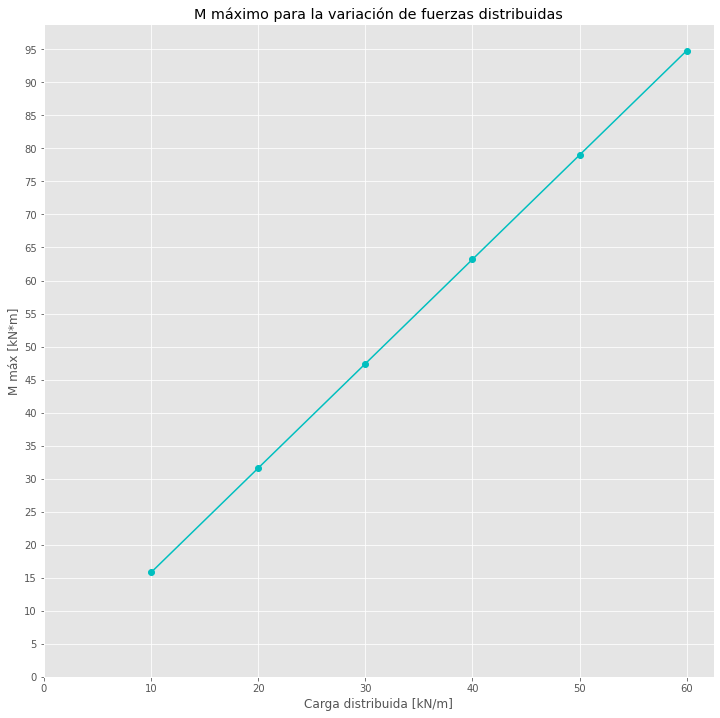

In [94]:
plt.style.use('ggplot')
fig =plt.figure(figsize=(12,12))

'Por último, queda solo realizar el respectivo plot'

plt.plot(VriaF1,M_max,color="c",marker="o")
plt.title("M máximo para la variación de fuerzas distribuidas")
plt.xlabel("Carga distribuida [kN/m]")
plt.ylabel("M máx [kN*m]")
plt.xticks(np.arange(0,70,10))
plt.yticks(np.arange(0,100,5))
plt.show